In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
nobel = pd.read_csv("nobel.csv")
nobel.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [3]:
nobel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  1000 non-null   int64 
 1   category              1000 non-null   object
 2   prize                 1000 non-null   object
 3   motivation            912 non-null    object
 4   prize_share           1000 non-null   object
 5   laureate_id           1000 non-null   int64 
 6   laureate_type         1000 non-null   object
 7   full_name             1000 non-null   object
 8   birth_date            968 non-null    object
 9   birth_city            964 non-null    object
 10  birth_country         969 non-null    object
 11  sex                   970 non-null    object
 12  organization_name     736 non-null    object
 13  organization_city     735 non-null    object
 14  organization_country  735 non-null    object
 15  death_date            596 non-null    o

In [4]:
nobel.describe()

,year,laureate_id
count,1000.000000,1000.000000
mean,1973.721000,509.099000
std,34.523195,298.130617
min,1901.000000,1.000000
25%,1949.750000,250.750000
50%,1979.000000,500.500000
75%,2003.000000,764.250000
max,2023.000000,1034.000000


In [5]:
numeric_columns = nobel.select_dtypes(include=['number']).columns.tolist()
categorical_columns = nobel.select_dtypes(include=['object', 'category']).columns.tolist()
print("Numeric Columns:", numeric_columns)
print("Categorical Columns:", categorical_columns)

Numeric Columns: ['year', 'laureate_id']
Categorical Columns: ['category', 'prize', 'motivation', 'prize_share', 'laureate_type', 'full_name', 'birth_date', 'birth_city', 'birth_country', 'sex', 'organization_name', 'organization_city', 'organization_country', 'death_date', 'death_city', 'death_country']


----

**Handle Missing Values:**

In [6]:
nobel.isna().sum()

year                      0
category                  0
prize                     0
motivation               88
prize_share               0
laureate_id               0
laureate_type             0
full_name                 0
birth_date               32
birth_city               36
birth_country            31
sex                      30
organization_name       264
organization_city       265
organization_country    265
death_date              404
death_city              421
death_country           415
dtype: int64

In [7]:
nobel["death_date"] = nobel["death_date"].replace(np.nan, 'UNKOWN')
nobel["death_city"] = nobel["death_city"].replace(np.nan, 'UNKOWN')
nobel["death_country"] = nobel["death_country"].replace(np.nan, 'UNKOWN')

nobel["birth_date"] = nobel["birth_date"].replace(np.nan, 'UNKOWN')
nobel["birth_city"] = nobel["birth_city"].replace(np.nan, 'UNKOWN')
nobel["birth_country"] = nobel["birth_country"].replace(np.nan, 'UNKOWN')

nobel["organization_name"] = nobel["organization_name"].replace(np.nan, 'UNKOWN')
nobel["organization_city"] = nobel["organization_city"].replace(np.nan, 'UNKOWN')
nobel["organization_country"] = nobel["organization_country"].replace(np.nan, 'UNKOWN')

nobel["motivation"] = nobel["motivation"].replace(np.nan, 'No Motivation')
nobel["sex"] = nobel["sex"].replace(np.nan, 'UNKOWN')


nobel.isna().sum()

year                    0
category                0
prize                   0
motivation              0
prize_share             0
laureate_id             0
laureate_type           0
full_name               0
birth_date              0
birth_city              0
birth_country           0
sex                     0
organization_name       0
organization_city       0
organization_country    0
death_date              0
death_city              0
death_country           0
dtype: int64

In [8]:
nobel.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,UNKOWN,UNKOWN,UNKOWN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,No Motivation,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,UNKOWN,UNKOWN,UNKOWN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,No Motivation,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,UNKOWN,UNKOWN,UNKOWN,1912-06-12,Paris,France


In [9]:
for i in nobel:
    print(i)
    print(nobel[i].unique())
    print("===========================")
    print("\n")

year
[1901 1902 1903 1904 1905 1906 1907 1908 1909 1910 1911 1912 1913 1914
 1915 1916 1917 1918 1919 1920 1921 1922 1923 1924 1925 1926 1927 1928
 1929 1930 1931 1932 1933 1934 1935 1936 1937 1938 1939 1943 1944 1945
 1946 1947 1948 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959
 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973
 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987
 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001
 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015
 2016 2017 2018 2019 2020 2021 2022 2023]


category
['Chemistry' 'Literature' 'Medicine' 'Peace' 'Physics' 'Economics']


prize
['The Nobel Prize in Chemistry 1901' 'The Nobel Prize in Literature 1901'
 'The Nobel Prize in Physiology or Medicine 1901'
 'The Nobel Peace Prize 1901' 'The Nobel Prize in Physics 1901'
 'The Nobel Prize in Chemistry 1902' 'The Nobel Prize in Literature 1902'
 'The Nobel Prize in Physiology or M

In [10]:
nobel["organization_country"] = nobel["organization_country"].replace('Alsace (then Germany, now France)', 'France')
nobel["organization_country"].unique()

array(['Germany', 'UNKOWN', 'United Kingdom', 'Netherlands', 'Sweden',
       'Denmark', 'France', 'Russia', 'Italy', 'Spain',
       'United States of America', 'Switzerland', 'Austria', 'Belgium',
       'Canada', 'India', 'Hungary', 'Finland', 'Argentina', 'Portugal',
       'Japan', 'Federal Republic of Germany', 'Ireland',
       'Union of Soviet Socialist Republics', 'Czechoslovakia',
       'Australia', 'Norway', 'Israel', 'China'], dtype=object)

-----

**Handle Duplicates:**

In [11]:
nobel.duplicated().sum()

0

-----

**Handle Outliers:**

In [12]:
outliers_summary = {}
for col in numeric_columns:
    Q1 = nobel[col].quantile(0.25)  
    Q3 = nobel[col].quantile(0.75)  
    IQR = Q3 - Q1                  

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    
    outliers = nobel[(nobel[col] < lower_bound) | (nobel[col] > upper_bound)]
    outliers_count = outliers.shape[0]
    outliers_summary[col] = outliers_count

for col, count in outliers_summary.items():
    print(f"Column: {col}, Outliers: {count}")

Column: year, Outliers: 0
Column: laureate_id, Outliers: 0


In [13]:
nobel = nobel.set_index("laureate_id")
nobel.sort_index(inplace=True, ascending=True)
nobel.head()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
laureate_id,,,,,,,,,,,,,,,,,
1,1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Male,Munich University,Munich,Germany,1923-02-10,Munich,Germany
2,1902,Physics,The Nobel Prize in Physics 1902,"""in recognition of the extraordinary service t...",1/2,Individual,Hendrik Antoon Lorentz,1853-07-18,Arnhem,Netherlands,Male,Leiden University,Leiden,Netherlands,1928-02-04,UNKOWN,Netherlands
3,1902,Physics,The Nobel Prize in Physics 1902,"""in recognition of the extraordinary service t...",1/2,Individual,Pieter Zeeman,1865-05-25,Zonnemaire,Netherlands,Male,Amsterdam University,Amsterdam,Netherlands,1943-10-09,Amsterdam,Netherlands
4,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/2,Individual,Antoine Henri Becquerel,1852-12-15,Paris,France,Male,École Polytechnique,Paris,France,1908-08-25,UNKOWN,France
5,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,Individual,Pierre Curie,1859-05-15,Paris,France,Male,École municipale de physique et de chimie indu...,Paris,France,1906-04-19,Paris,France


------

**Insights:**

In [14]:
# Most Countries Winning
MCW = nobel.groupby("birth_country")["birth_country"].count()
MCW.sort_values(ascending=False,inplace=True)
MCW

birth_country
United States of America                        291
United Kingdom                                   91
Germany                                          67
France                                           58
UNKOWN                                           31
                                               ... 
German-occupied Poland (Poland)                   1
French protectorate of Tunisia (now Tunisia)      1
Free City of Danzig (Poland)                      1
Faroe Islands (Denmark)                           1
Yemen                                             1
Name: birth_country, Length: 130, dtype: int64

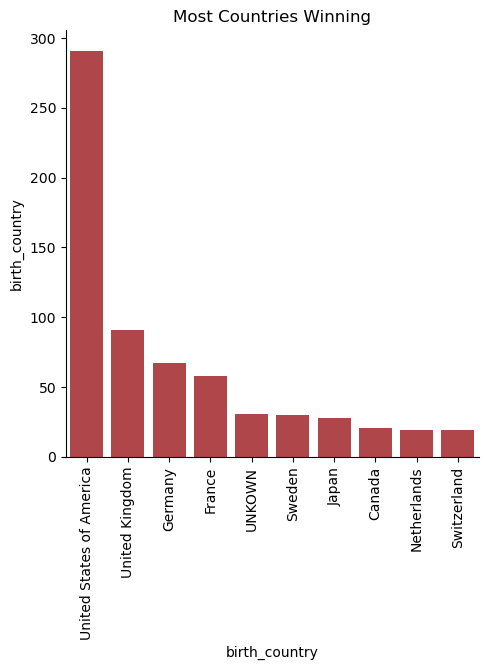

In [15]:
MCW_TOP_10 = MCW.head(10)
sns.set_palette("RdBu")
sns.catplot(x = MCW_TOP_10.index, y= MCW_TOP_10, kind = "bar")
plt.xticks(rotation = 90)
plt.title("Most Countries Winning")
plt.show()

In [16]:
# Most Gender Winning
MGW = nobel.groupby("sex")["sex"].count()
MGW.sort_values(ascending=False,inplace=True)
MGW

sex
Male      905
Female     65
UNKOWN     30
Name: sex, dtype: int64

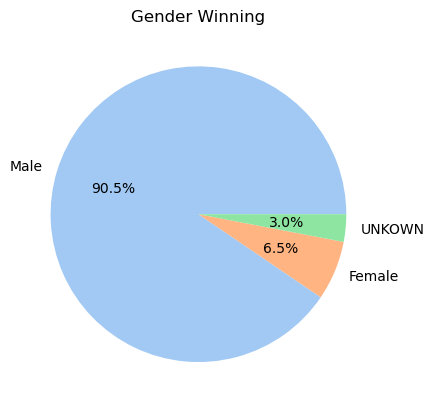

In [17]:
sns.set_palette("pastel")
plt.pie(MGW, labels = ["Male", "Female", "UNKOWN"], autopct="%1.1f%%")
plt.title("Gender Winning")
plt.show()

In [18]:
# Most Winners
MW = nobel.groupby("full_name")["full_name"].count()
MW.sort_values(ascending=False,inplace=True)
MW

full_name
Comité international de la Croix Rouge (International Committee of the Red Cross)    3
Office of the United Nations High Commissioner for Refugees (UNHCR)                  2
Frederick Sanger                                                                     2
Linus Carl Pauling                                                                   2
John Bardeen                                                                         2
                                                                                    ..
Gertrude B. Elion                                                                    1
Gerty Theresa Cori, née Radnitz                                                      1
Giorgio Parisi                                                                       1
Giorgos Seferis                                                                      1
Élie Ducommun                                                                        1
Name: full_name, Length: 993, dty

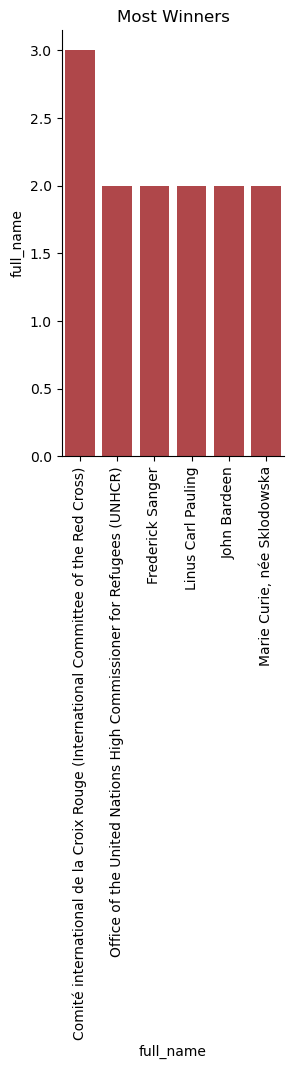

In [19]:
MW_TOP = MW[MW > 1]
sns.set_palette("RdBu")
sns.catplot(x = MW_TOP.index, y= MW_TOP, kind = "bar")
plt.xticks(rotation = 90)
plt.title("Most Winners")
plt.show()

In [20]:
nobel['decade'] = (nobel['year'] // 10) * 10
nobel

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,decade
laureate_id,,,,,,,,,,,,,,,,,,
1,1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Male,Munich University,Munich,Germany,1923-02-10,Munich,Germany,1900
2,1902,Physics,The Nobel Prize in Physics 1902,"""in recognition of the extraordinary service t...",1/2,Individual,Hendrik Antoon Lorentz,1853-07-18,Arnhem,Netherlands,Male,Leiden University,Leiden,Netherlands,1928-02-04,UNKOWN,Netherlands,1900
3,1902,Physics,The Nobel Prize in Physics 1902,"""in recognition of the extraordinary service t...",1/2,Individual,Pieter Zeeman,1865-05-25,Zonnemaire,Netherlands,Male,Amsterdam University,Amsterdam,Netherlands,1943-10-09,Amsterdam,Netherlands,1900
4,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/2,Individual,Antoine Henri Becquerel,1852-12-15,Paris,France,Male,École Polytechnique,Paris,France,1908-08-25,UNKOWN,France,1900
5,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,Individual,Pierre Curie,1859-05-15,Paris,France,Male,École municipale de physique et de chimie indu...,Paris,France,1906-04-19,Paris,France,1900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1030,2023,Chemistry,The Nobel Prize in Chemistry 2023,"""for the discovery and synthesis of quantum dots""",1/3,Individual,Louis Brus,1943-00-00,"Cleveland, OH",United States of America,Male,Columbia University,"New York, NY",United States of America,UNKOWN,UNKOWN,UNKOWN,2020
1031,2023,Chemistry,The Nobel Prize in Chemistry 2023,"""for the discovery and synthesis of quantum dots""",1/3,Individual,Aleksey Yekimov,1945-00-00,UNKOWN,USSR (now Russia),Male,Nanocrystals Technology Inc.,"New York, NY",United States of America,UNKOWN,UNKOWN,UNKOWN,2020
1032,2023,Literature,The Nobel Prize in Literature 2023,"""for his innovative plays and prose which give...",1/1,Individual,Jon Fosse,1959-09-29,Haugesund,Norway,Male,UNKOWN,UNKOWN,UNKOWN,UNKOWN,UNKOWN,UNKOWN,2020


In [21]:
# decade and Nobel Prize category combination had the highest proportion of female laureates

nobel['female_winner'] = nobel['sex'] == 'Female'
prop_female_winners = nobel.groupby(['decade', 'category'], as_index=False)['female_winner'].mean()
max_female_decade_category = prop_female_winners[prop_female_winners['female_winner'] == prop_female_winners['female_winner'].max()][['decade', 'category']]
max_female_decade_category

,decade,category
68,2020,Literature


In [22]:
# the first woman to receive a Nobel Prize, and her category

females = nobel[nobel["sex"] == "Female"]
females = females.sort_values(by = "year", ascending = True)
females.loc[:,["year","full_name", "category"]].head(1)

,year,full_name,category
laureate_id,,,
6,1903,"Marie Curie, née Sklodowska",Physics


In [23]:
type = nobel.groupby("laureate_type")["laureate_type"].count()
type

laureate_type
Individual      966
Organization     34
Name: laureate_type, dtype: int64

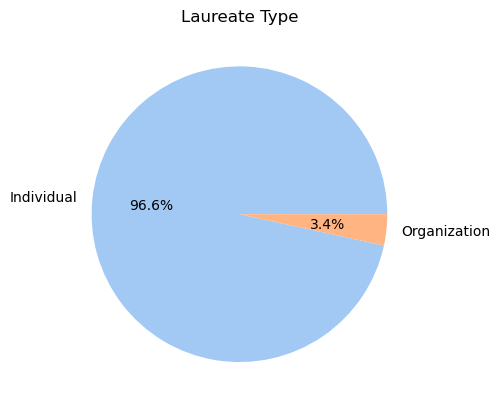

In [24]:
sns.set_palette("pastel")
plt.pie(type, labels = nobel["laureate_type"].unique(), autopct="%1.1f%%")
plt.title("Laureate Type")
plt.show()

In [25]:
nobel.to_csv("Nobel_Analysis.csv")
